# Question 3B: Shooting Method

Given the second order differential equation function.

$$ \frac{d^2y}{dx^2} = f(x, y , \frac{dy}{dx} )$$
$$ xy'' - 2xy' +2y = x^3sin(x) $$

The Boundary value problem:

$$ y(\frac{\pi}{2}) = \frac{1}{20}\pi^2 - \pi, \ and \ y(2\pi) = \frac{4}{5}\pi^2 - 2\pi $$

The step size $h=\frac{\pi}{20}$ the actual $y(x)$ is unknown, we wish to find $y(\frac{3\pi}{2})$.

We will make a guess of the value $y'(0) = 4$

We can then reduce the BVP to simultaneous 1st order equations. These we are IVPs, and we can use IVP methods like Euler's method.
$$
\begin{align*}
\frac{dy}{dx} &= z \\
&= f_1(x, y, z)     \qquad (1) \ (\ note \ this \ is \ just \ assumed) \\
\frac{dz}{dx} &= x^2sin(x) + 2z - 2\frac{y}{x} \\
&= f_2(x,y,z) \qquad (2) \\
\end{align*}
$$


To solve we use an IVP method, we will use EUlers:

$$ y_{i+1} = y_i + f_1(x_i, y_i, z_i)h $$
$$ z_{i+1} = z_i + f_2(x_i, y_i, z_i)h $$




In [1]:
## Library
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

## Defining the Function

In [2]:
def myfun_f1(x,y,z):
    return (z)

def myfun_f2(x,y,z):
    return (x**2*math.sin(x) +2*z -2*y/x)


## Discrete Interval 
Here we will use a step sizes on the  $ \frac{\pi}{2} \leq x \leq 2\pi $.
### Interval
The step Size will be $h_{1} = \frac{\pi}{20}$

with the discrete time steps,
$$ x_{i} = 0 + \frac{\pi}{20}i $$
for  $i=0,1,...,30$.



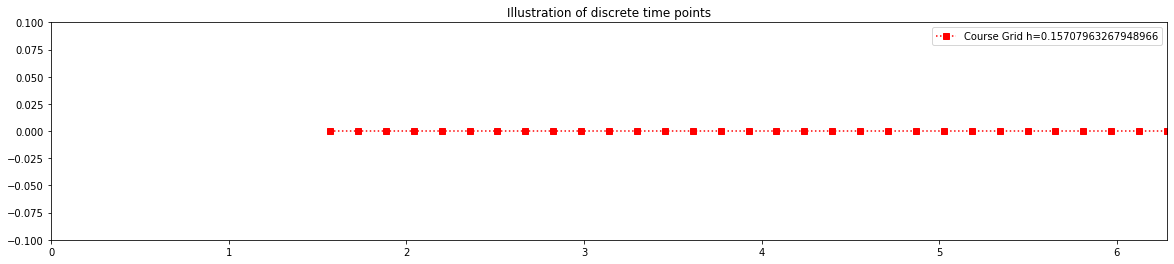

In [3]:
# Start and end of interval
b=2*math.pi
a=math.pi/2
# Steps N1=400
N1=30

h1=math.pi/20

x1=np.arange(a,b+h1,h1)


fig = plt.figure(figsize=(20,4))
plt.plot(x1,0*x1,'s:',color='red',label='Course Grid h=%s'%(h1))


plt.xlim((0,2*math.pi))
plt.ylim((-0.1,0.1))
plt.title('Illustration of discrete time points')
plt.legend()
plt.show()

## Setting up the inital Conditions for our 1st guess
$$ w_{1} = \pi/2 $$
$$ z_{1} = 4 $$

## Setting up the inital Conditions for our 2nd guess
$$ w_{2} = \pi/2 $$
$$ z_{2} = -4 $$

In [4]:
## 1st Guess 

IC_W1=1/20*math.pi**2 - math.pi # Intial condtion
IC_Z1=4 # Intial condtion

w1 = np.zeros(N1+1)
z1 = np.zeros(N1+1)


w1[0]=IC_W1
z1[0]=IC_Z1

## 2nd Guess 

IC_W2=1/20*math.pi**2 - math.pi  # Intial condtion
IC_Z2=-4 # Intial condtion

w2 = np.zeros(N1+1)
z2 = np.zeros(N1+1)


w2[0]=IC_W2
z2[0]=IC_Z2



## Euler Method

$$ w_{i+1} = w_{i} + hf_1(x_{i}, w_{i}, z_{i}) $$

$$ z_{i+1} = z_{i} + hf_2(x_{i}, w_{i}, z_{i}) $$





Text(0.5, 1.0, 'BVP Shooting Method 1st and 2nd Guesses (z=4,-4) solution')

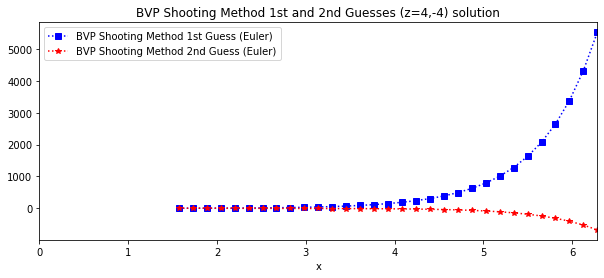

In [5]:

for i in range (0,N1):
    z1[i+1]=z1[i]+h1*myfun_f2(x1[i], w1[i], z1[i])
    w1[i+1]=w1[i]+h1*myfun_f1(x1[i], w1[i], z1[i])
    z2[i+1]=z2[i]+h1*myfun_f2(x1[i], w2[i], z2[i])
    w2[i+1]=w2[i]+h1*myfun_f1(x1[i], w2[i], z2[i])
    
    
    
    
fig = plt.figure(figsize=(10,4))
plt.plot(x1,w1,'s:',color='blue',label='BVP Shooting Method 1st Guess (Euler)')
plt.plot(x1,w2,'*:',color='red',label='BVP Shooting Method 2nd Guess (Euler)')


plt.xlim((0,2*math.pi))
plt.xlabel('x')
plt.legend(loc='best')
plt.title('BVP Shooting Method 1st and 2nd Guesses (z=4,-4) solution')



In [7]:
table = ListTable()
table.append(['x', 'w1', 'z1','w2', 'z2'
              ])
tableSize = 30
for i in range (0,tableSize+1):
    table.append([round(x1[i],5), round(w1[i],5), round(z1[i],5), round(w2[i],5), round(z2[i],5)])
    
table

x,w1,z1,w2,z2
1.5708,-2.64811,4.0,-2.64811,-4.0
1.72788,-2.01979,6.17384,-3.27643,-4.33944
1.88496,-1.05001,8.94384,-3.95807,-4.6438
2.04204,0.35489,12.45943,-4.68751,-4.91222
2.19911,2.31201,16.90269,-5.45912,-5.15066
2.35619,4.96708,22.49711,-6.26819,-5.37434
2.51327,8.50091,29.51914,-7.11239,-5.61035
2.67035,13.13777,38.31344,-7.99366,-5.90065
2.82743,19.15603,49.31286,-8.92053,-6.30544
2.98451,26.90208,63.06455,-9.91099,-6.90714


$y'(0)$ | $y_3 \approx y(12)$ | 
--- | --- |
$p_0$ | $q_0$ | 
$p_1$ | $q_1$ | 


Interpolating a more accurate value for $y'(0)$:

$$ p = p_0 + \frac{p_1-p_0}{q_1-q_0}(q-q_0) $$

In the example above we have:

$y'(0)$ | $y_3 \approx y(12)$ | 
--- | --- |
4 | 205.798 | 
-4 | -54.622 | 


Therefore:

$$ p = 4 + \frac{-4 -4}{-54.622 - 205.798}(q-205.798) $$

We want the value of p when $q=1.612$, therefore $p = -2.$

We now rerun through the IVP method with y(0) =0 and y'(0) = -70.79508 as the initial conditions.


In [8]:
## Best Guess
EC=4/5*math.pi**2 - 2*math.pi # Intial condtion
print(EC)
p = z1[0] + (z2[0]-z1[0])/(w2[N1]-w1[N1])*(EC-w1[N1])
print(p)

IC_W3=1/20*math.pi**2 - math.pi # Intial condtion
IC_Z3=p # Intial condtion
w3 = np.zeros(N1+1)
z3 = np.zeros(N1+1)

w3[0]=IC_W3
z3[0]=IC_Z3

1.6124982136919002
-3.116705061014798


Text(0.5, 1.0, 'BVP Shooting Method Best Guess (z=-3.1167) solution')

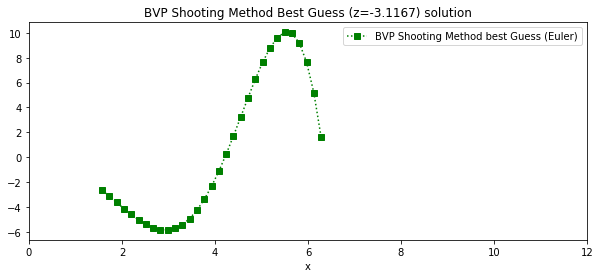

In [11]:
for i in range (0,N1):
    w3[i+1]=w3[i]+h1*myfun_f1(x1[i], w3[i], z3[i])
    z3[i+1]=z3[i]+h1*myfun_f2(x1[i], w3[i], z3[i])
    
    
    
    
fig = plt.figure(figsize=(10,4))
plt.plot(x1,w3,'s:',color='green',label='BVP Shooting Method best Guess (Euler)')



plt.xlim((0,12))
plt.xlabel('x')
plt.legend(loc='best')
plt.title('BVP Shooting Method Best Guess (z=-3.1167) solution')

In [12]:
table = ListTable()
table.append(['x', 'w1', 'z1','w2', 'z2', 'w3', 'z3'
              ])

table.append([round(x1[int(4/h1)],5), round(w1[int(4/h1)],5), round(z1[int(4/h1)],5), 
              round(w2[int(4/h1)],5), round(z2[int(4/h1)],5), 
                 round(w3[int(4/h1)],5), round(z3[int(4/h1)],5)])
table.append([round(x1[N1],5), round(w1[N1],5), round(z1[N1],5), round(w2[N1],5), round(z2[N1],5), 
                 round(w3[N1],5), round(z3[N1],5)])

"""
tableSize = 3
for i in range (0,tableSize+1):
    table.append([round(x1[i],5), round(w1[i],5), round(z1[i],5), round(w2[i],5), round(z2[i],5), 
                 round(w3[i],5), round(z3[i],5)])
"""
    
table

x,w1,z1,w2,z2,w3,z3
5.49779,1627.7013,2848.22302,-190.72543,-354.2208,10.05047,-0.63299
6.28319,5533.7938,9897.85798,-685.01814,-1263.52271,1.6125,-31.17382
